Using values from JacobiRadius.csv:
  Apo: R=219.0 kpc, R_J=84.3 kpc
  Peri: R=34.0 kpc, R_J=18.9 kpc
Diagram saved to Fig2_Methodology_Diagram_LargerFont.png


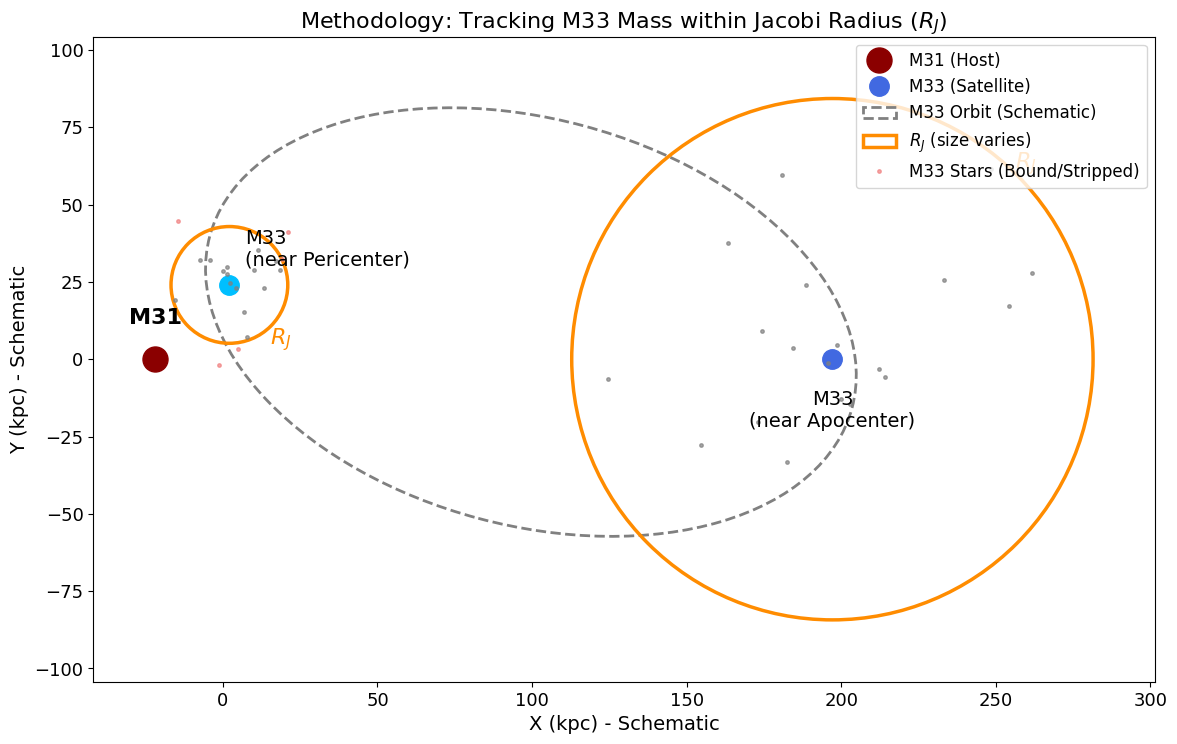

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import os
from pathlib import Path # Using pathlib
import matplotlib # Import matplotlib to access rcParams

# --- Configuration ---
JACOBI_CSV = "JacobiRadius.csv"
# *** Changed output filename ***
OUTPUT_FILENAME = "Fig2_Methodology_Diagram_LargerFont.png"

# Default values if CSV not found or empty
DEFAULT_APO_R = 150.0
DEFAULT_APO_RJ = 30.0
DEFAULT_PERI_R = 40.0
DEFAULT_PERI_RJ = 15.0

# --- Set Global Font Size ---
# Increase the base font size for most elements (labels, ticks, default text)
# Adjust this value (e.g., 14, 16, 18) as needed for your paper's requirements
BASE_FONT_SIZE = 14
plt.rcParams.update({'font.size': BASE_FONT_SIZE})
# Optionally increase title size even more relative to base
plt.rcParams['axes.titlesize'] = BASE_FONT_SIZE + 2
# Optionally increase label size relative to base
plt.rcParams['axes.labelsize'] = BASE_FONT_SIZE
# Optionally increase legend size relative to base (can also be set in ax.legend)
plt.rcParams['legend.fontsize'] = BASE_FONT_SIZE - 2 # Make legend slightly smaller than axes
# Optionally increase tick label size
plt.rcParams['xtick.labelsize'] = BASE_FONT_SIZE - 1
plt.rcParams['ytick.labelsize'] = BASE_FONT_SIZE - 1


# --- Try to load actual values ---
apo_r, apo_rj = DEFAULT_APO_R, DEFAULT_APO_RJ
peri_r, peri_rj = DEFAULT_PERI_R, DEFAULT_PERI_RJ

if os.path.exists(JACOBI_CSV):
    try:
        jaco_df = pd.read_csv(JACOBI_CSV)
        if not jaco_df.empty:
            # Find approximate apocenter (max separation)
            apo_idx = jaco_df['r_M31_M33'].idxmax()
            apo_r = jaco_df.loc[apo_idx, 'r_M31_M33']
            apo_rj = jaco_df.loc[apo_idx, 'JacobiR']

            # Find approximate pericenter (min separation)
            peri_idx = jaco_df['r_M31_M33'].idxmin()
            peri_r = jaco_df.loc[peri_idx, 'r_M31_M33']
            peri_rj = jaco_df.loc[peri_idx, 'JacobiR']

            print(f"Using values from {JACOBI_CSV}:")
            print(f"  Apo: R={apo_r:.1f} kpc, R_J={apo_rj:.1f} kpc")
            print(f"  Peri: R={peri_r:.1f} kpc, R_J={peri_rj:.1f} kpc")
        else:
             print(f"Warning: {JACOBI_CSV} is empty. Using default values.")
    except Exception as e:
        print(f"Warning: Could not read or parse {JACOBI_CSV}: {e}. Using default values.")
else:
    print(f"Warning: {JACOBI_CSV} not found. Using default values.")


# --- Create Plot ---
fig, ax = plt.subplots(figsize=(12, 8)) # Consider if figsize needs adjustment too

# 1. M31 (Host) - position it somewhat off-center
m31_pos = (-apo_r * 0.1, 0) # Place M31 slightly left
# *** Increased markersize ***
ax.plot(m31_pos[0], m31_pos[1], 'o', markersize=18, color='darkred', label='M31 (Host)')
# *** Fontsize will use rcParams default, added specific fontsize for emphasis ***
ax.text(m31_pos[0], m31_pos[1] + 10, 'M31', ha='center', va='bottom', weight='bold', fontsize=BASE_FONT_SIZE + 2)

# 2. M33 Positions (Satellite) - show near apo and peri
m33_apo_pos = (m31_pos[0] + apo_r, 0)
m33_peri_pos = (m31_pos[0] + peri_r * np.cos(np.pi/4), peri_r * np.sin(np.pi/4)) # Put peri at an angle

# *** Increased markersize ***
ax.plot(m33_apo_pos[0], m33_apo_pos[1], 'o', markersize=14, color='royalblue', label='M33 (Satellite)')
# *** Fontsize will use rcParams default ***
ax.text(m33_apo_pos[0], m33_apo_pos[1] - 10, 'M33\n(near Apocenter)', ha='center', va='top')

# *** Increased markersize ***
ax.plot(m33_peri_pos[0], m33_peri_pos[1], 'o', markersize=14, color='deepskyblue') # No label for second pos
# *** Fontsize will use rcParams default ***
ax.text(m33_peri_pos[0] + 5, m33_peri_pos[1] + 5, 'M33\n(near Pericenter)', ha='left', va='bottom')

# 3. Schematic Orbit (Ellipse - adjust parameters as needed)
orbit_center_x = m31_pos[0] + (apo_r + peri_r*np.cos(np.pi/4)) / 2
orbit_center_y = peri_r*np.sin(np.pi/4) / 2
orbit_width = (apo_r - peri_r*np.cos(np.pi/4)) + 20 # Make slightly wider than apo/peri points
orbit_height = apo_r * 0.6 # Adjust height aesthetically
# *** Increased linewidth ***
orbit = patches.Ellipse((orbit_center_x, orbit_center_y), width=orbit_width, height=orbit_height,
                        angle=-15, # Slight tilt
                        edgecolor='gray', facecolor='none', linestyle='--', linewidth=2.0, label='M33 Orbit (Schematic)')
ax.add_patch(orbit)

# 4. Jacobi Radii
# RJ at Apocenter
# *** Increased linewidth ***
rj_apo_circle = patches.Circle(m33_apo_pos, apo_rj, edgecolor='darkorange', facecolor='none',
                               linestyle='-', linewidth=2.5, label=f'$R_J$ (size varies)')
ax.add_patch(rj_apo_circle)
# *** Increased R_J label size ***
ax.text(m33_apo_pos[0] + apo_rj * 0.7, m33_apo_pos[1] + apo_rj * 0.7, '$R_J$', color='darkorange',
        ha='left', va='bottom', style='italic', fontsize=BASE_FONT_SIZE + 2)


# RJ at Pericenter
# *** Increased linewidth ***
rj_peri_circle = patches.Circle(m33_peri_pos, peri_rj, edgecolor='darkorange', facecolor='none',
                                 linestyle='-', linewidth=2.5)
ax.add_patch(rj_peri_circle)
# *** Increased R_J label size ***
ax.text(m33_peri_pos[0] + peri_rj * 0.7, m33_peri_pos[1] - peri_rj * 0.7, '$R_J$', color='darkorange',
        ha='left', va='top', style='italic', fontsize=BASE_FONT_SIZE + 2)


# 5. Add Schematic Particles (Optional)
# Particles bound near Apo
np.random.seed(42)
n_bound_apo = 20
bound_r_apo = np.random.rand(n_bound_apo) * apo_rj
bound_a_apo = np.random.rand(n_bound_apo) * 2 * np.pi
bound_x_apo = m33_apo_pos[0] + bound_r_apo * np.cos(bound_a_apo)
bound_y_apo = m33_apo_pos[1] + bound_r_apo * np.sin(bound_a_apo)
# *** Increased particle markersize ***
ax.plot(bound_x_apo, bound_y_apo, '.', markersize=5, color='grey', alpha=0.7)

# Particles bound near Peri
n_bound_peri = 15 # Fewer bound potentially
bound_r_peri = np.random.rand(n_bound_peri) * peri_rj
bound_a_peri = np.random.rand(n_bound_peri) * 2 * np.pi
bound_x_peri = m33_peri_pos[0] + bound_r_peri * np.cos(bound_a_peri)
bound_y_peri = m33_peri_pos[1] + bound_r_peri * np.sin(bound_a_peri)
# *** Increased particle markersize ***
ax.plot(bound_x_peri, bound_y_peri, '.', markersize=5, color='grey', alpha=0.7)

# Some stripped particles near peri
n_strip_peri = 5
strip_r_peri = peri_rj + np.random.rand(n_strip_peri) * peri_rj * 0.5 # Just outside Rj
strip_a_peri = np.random.rand(n_strip_peri) * 2 * np.pi
strip_x_peri = m33_peri_pos[0] + strip_r_peri * np.cos(strip_a_peri)
strip_y_peri = m33_peri_pos[1] + strip_r_peri * np.sin(strip_a_peri)
# *** Changed label from 'M33 Stars' to be more specific ***
# *** Increased particle markersize ***
ax.plot(strip_x_peri, strip_y_peri, '.', markersize=5, color='lightcoral', alpha=0.7, label='M33 Stars (Bound/Stripped)')

'''
# 6. Annotation for Methodology
method_text = ("Analysis Goal:\n"
               "Track mass of M33 stars (dots)\n"
               "gravitationally bound within\n"
               "the time-varying Jacobi Radius ($R_J$)")
# *** Fontsize will now use rcParams default, or you can override it here ***
# *** Example: use fontsize=BASE_FONT_SIZE or fontsize=BASE_FONT_SIZE - 2 ***
ax.text(0.05, 0.05, method_text, transform=ax.transAxes, fontsize=BASE_FONT_SIZE - 1,
        verticalalignment='bottom', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5)) # Increased pad slightly
'''

# --- Final Plot Adjustments ---
ax.set_aspect('equal', adjustable='box')
# *** Legend fontsize is now controlled by rcParams or can be set explicitly here ***
# *** Explicitly setting it here overrides rcParams['legend.fontsize'] ***
ax.legend(loc='upper right', fontsize=BASE_FONT_SIZE - 2) # e.g., 12 if BASE_FONT_SIZE is 14
# *** Title fontsize now uses rcParams['axes.titlesize'] ***
ax.set_title('Methodology: Tracking M33 Mass within Jacobi Radius ($R_J$)')
# *** X/Y Label font sizes now use rcParams['axes.labelsize'] ***
ax.set_xlabel('X (kpc) - Schematic')
ax.set_ylabel('Y (kpc) - Schematic')
# *** Tick label sizes use rcParams['xtick.labelsize'] and 'ytick.labelsize' ***

# Adjust plot limits to fit everything - may need tuning
min_x = m31_pos[0] - 20
max_x = m33_apo_pos[0] + apo_rj + 20
max_y = max(m33_peri_pos[1] + peri_rj, apo_rj, orbit_height/2.0) + 20
min_y = min(m33_peri_pos[1] - peri_rj, -apo_rj, -orbit_height/2.0) - 20
ax.set_xlim(min_x, max_x)
ax.set_ylim(min_y, max_y)


plt.tight_layout() # Use tight_layout again for automatic spacing
plt.savefig(OUTPUT_FILENAME, dpi=300)
print(f"Diagram saved to {OUTPUT_FILENAME}")
plt.show()